[Link for Dataset](https://docs.google.com/spreadsheets/d/1gWImnU9VCcQNbNY9SZDFgM0mF7pIpBZecPvo2efpg4M/edit#gid=0)
https://www.kaggle.com/mohansacharya/graduate-admissions?select=Admission_Predict_Ver1.1.csv

**List of Variables**

1. GRE Scores ( out of 340 )
2. TOEFL Scores ( out of 120 )
3. University Rating ( out of 5 )
4. Statement of Purpose 
5.  Letter of Recommendation Strength ( out of 5 )
6. Undergraduate GPA ( out of 10 )
7. Research Experience ( either 0 or 1 )

DEPENDENT VAR. Chance of Admit ( ranging from 0 to 1 )

No of entries : 500


---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

%matplotlib inline

In [2]:
dp = pd.read_csv ('./Adm.csv')

In [3]:
dp.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
dp.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [5]:
print ('Data Description')
dp.describe()

Data Description


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
print ('Data Information')
dp.info()

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
dp.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
dp=dp.rename(columns={'Serial No.':'SerialNo','GRE Score':'GREScore','TOEFL Score':'TOEFLScore','LOR ':'LOR','University Rating':'UniversityRating','Chance of Admit ':'ChanceOfAdmit'})

In [9]:
dp.dtypes

SerialNo              int64
GREScore              int64
TOEFLScore            int64
UniversityRating      int64
SOP                 float64
LOR                 float64
CGPA                float64
Research              int64
ChanceOfAdmit       float64
dtype: object

In [10]:
dp.shape

(500, 9)

In [11]:
print('The result is that the value of SeriaNo feature does not have any significance.')
print('Because it is an increasing value and personalized does not matter any.')

len(dp['SerialNo'].unique())

The result is that the value of SeriaNo feature does not have any significance.
Because it is an increasing value and personalized does not matter any.


500

In [12]:
dp.isnull().values.any()

False

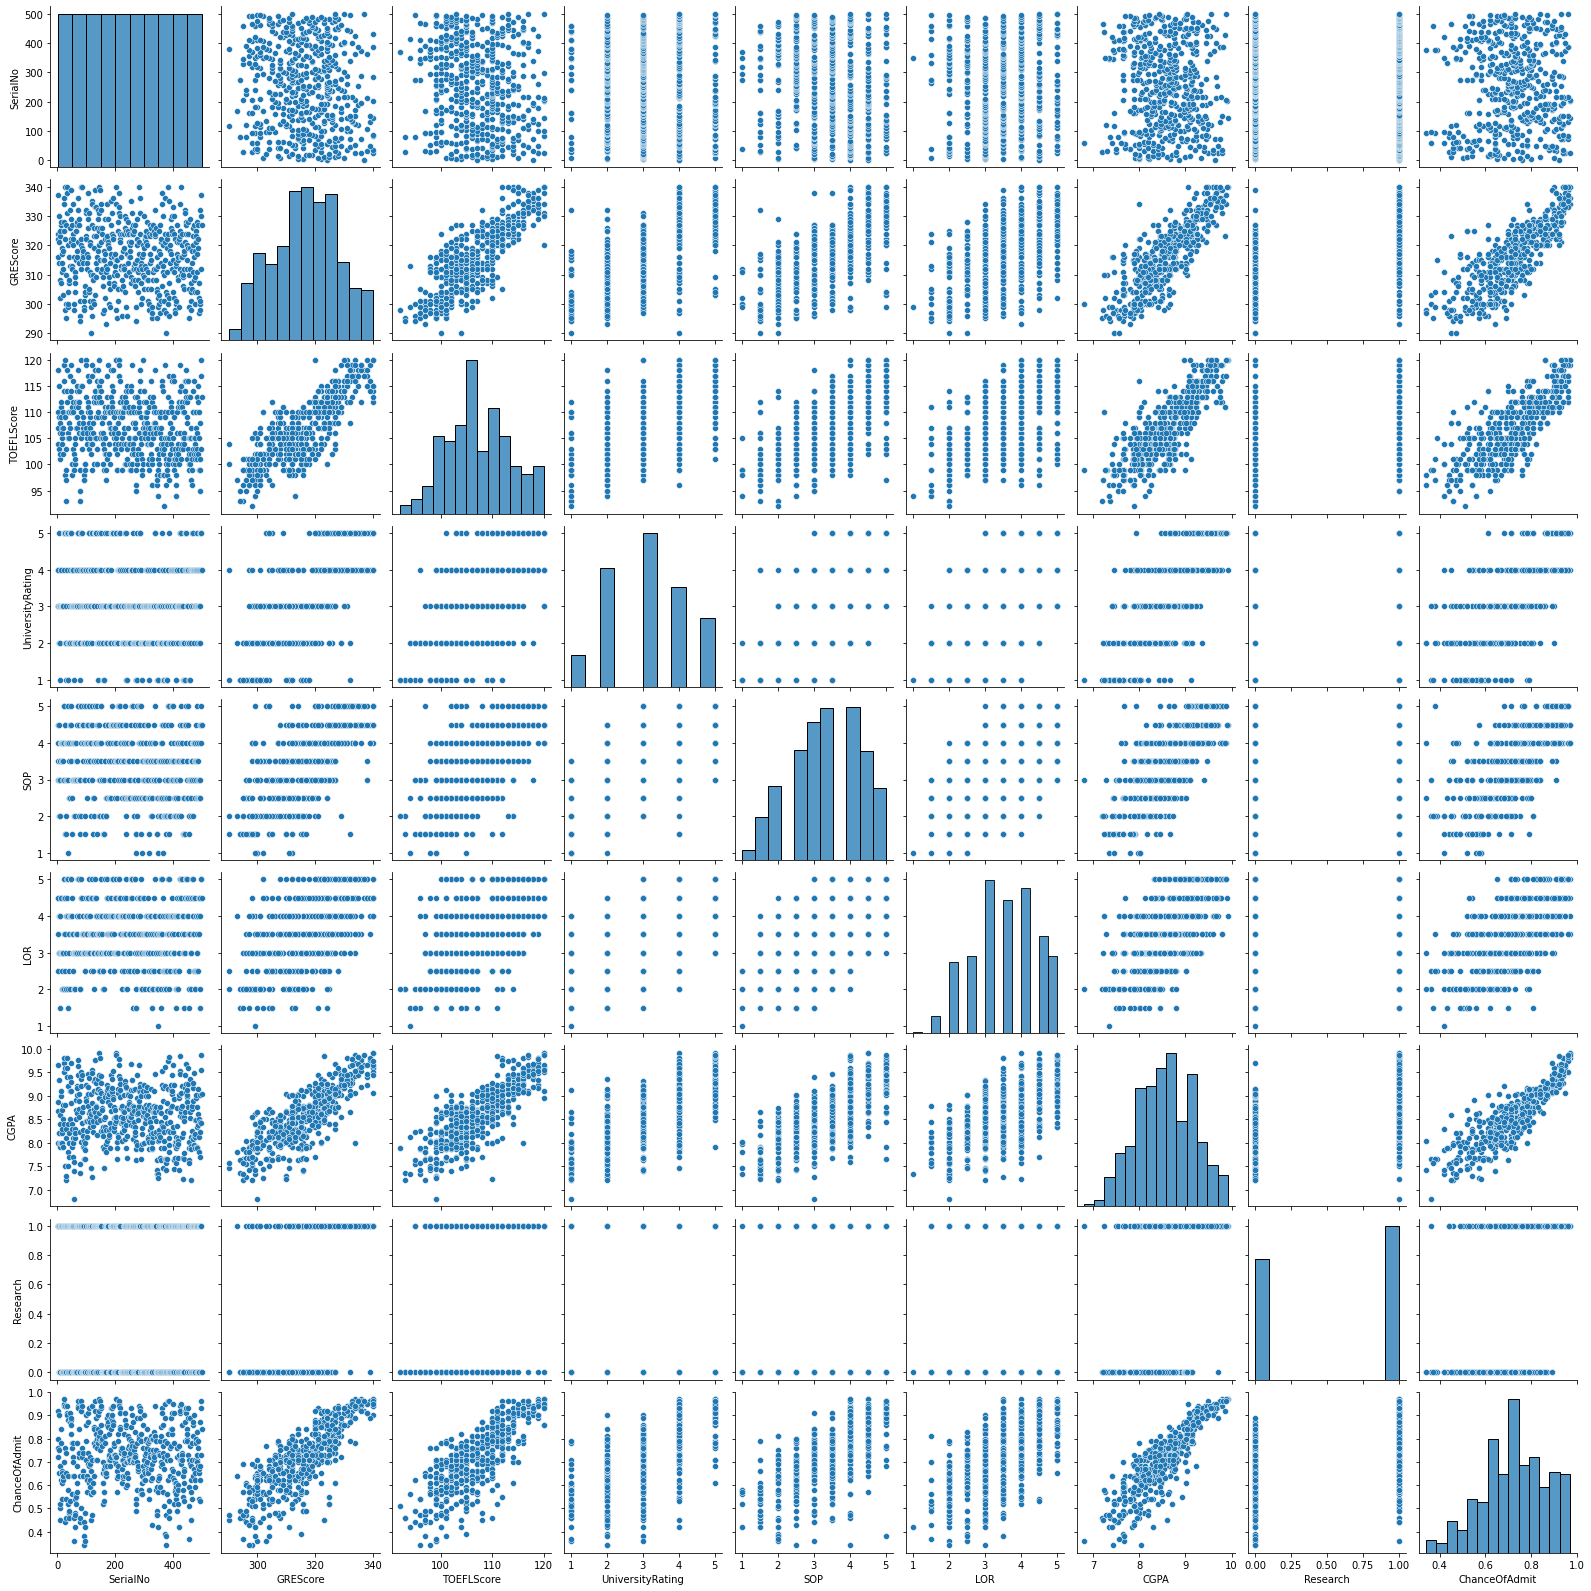

In [13]:
sns.pairplot(dp)
plt.show()

<AxesSubplot:>

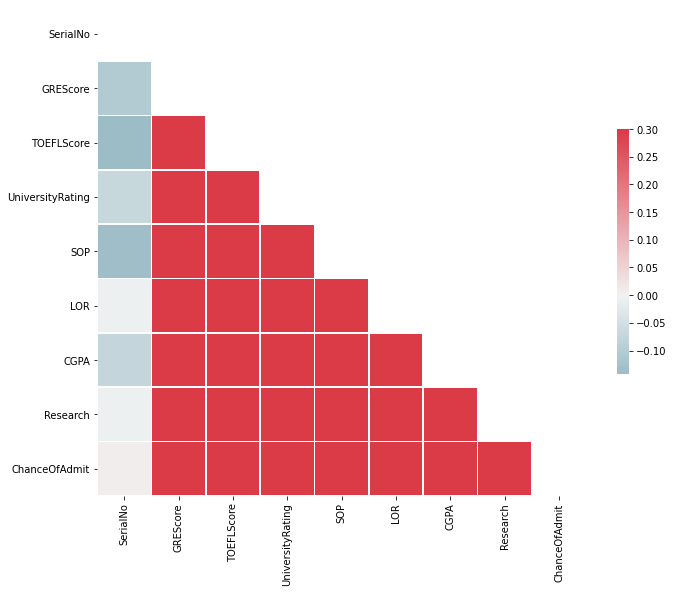

In [14]:
corr = dp.corr()
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f,ax = plt.subplots(figsize=(11,9))
cmap= sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

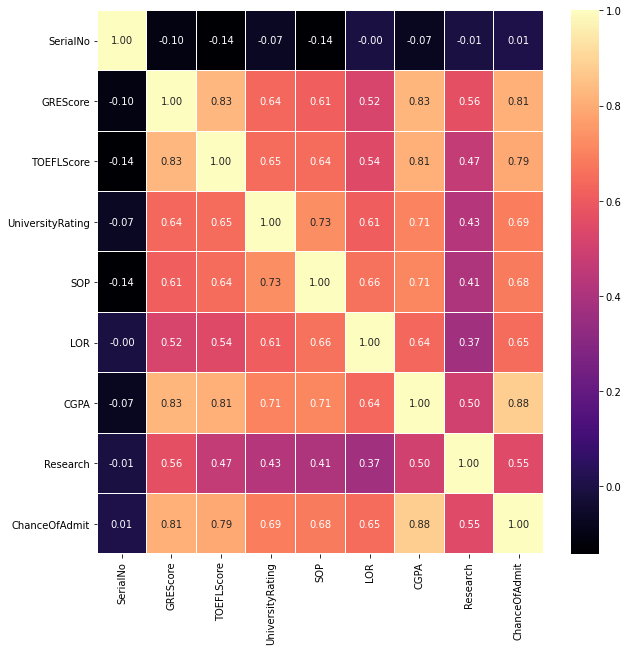

In [15]:
plt.figure(figsize=(10, 10))
sns.heatmap(dp.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

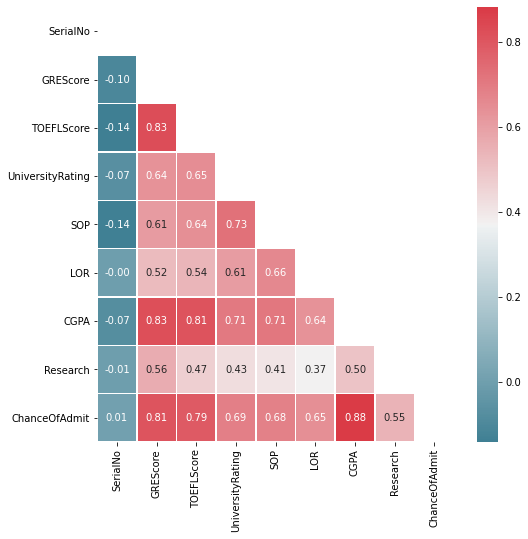

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

**Research Analysis**


In [17]:
dp=dp.drop(['SerialNo'],axis=1) #1 column 0 row

In [18]:
dp.corr()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
GREScore,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFLScore,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
UniversityRating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
ChanceOfAdmit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [19]:
dp.iloc[:,:6].corr()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA
GREScore,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878
TOEFLScore,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574
UniversityRating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000


**RESEARCH ANALYSIS**

In [20]:
dp.columns

Index(['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'ChanceOfAdmit'],
      dtype='object')

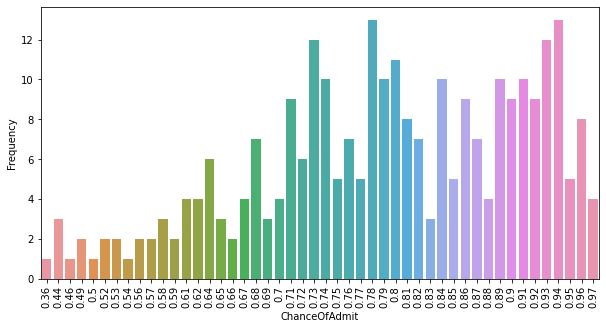

In [21]:
#Research group 1, ChanceOfAdmit value of all TOEFLScore data by grouping the number of data is performed.
plt.figure(figsize=(10,5))
research_predict=dp[dp['Research']==1.0].groupby('ChanceOfAdmit')['TOEFLScore'].count()
sns.barplot(x=research_predict.index,y=research_predict.values)
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

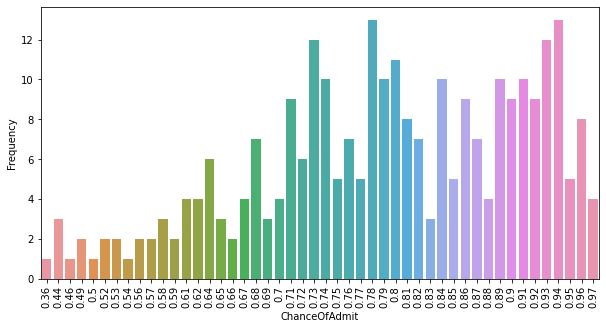

In [22]:
#Research group 1, ChanceOfAdmit value of all TOEFLScore data by grouping the number of data is performed.
plt.figure(figsize=(10,5))
research_predict=dp[dp['Research']==1.0].groupby('ChanceOfAdmit')['TOEFLScore'].count()
research_predict=research_predict.sort_values(ascending=True)
sns.barplot(x=research_predict.index,y=research_predict.values)
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [23]:
dp.head(1)

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
0,337,118,4,4.5,4.5,9.65,1,0.92


In [24]:
max(dp['UniversityRating'])

5

In [25]:
filter_data=dp[np.logical_and(dp['ChanceOfAdmit']==1.0,dp['UniversityRating']==max(dp['UniversityRating']))]

In [26]:
filter_data.groupby('UniversityRating')[['GREScore','TOEFLScore','CGPA']].mean()

,GREScore,TOEFLScore,CGPA
UniversityRating,,,


/home/first/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/first/.local/lib/python3.8/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/first/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/first/.local/lib/python3.8/site-packag

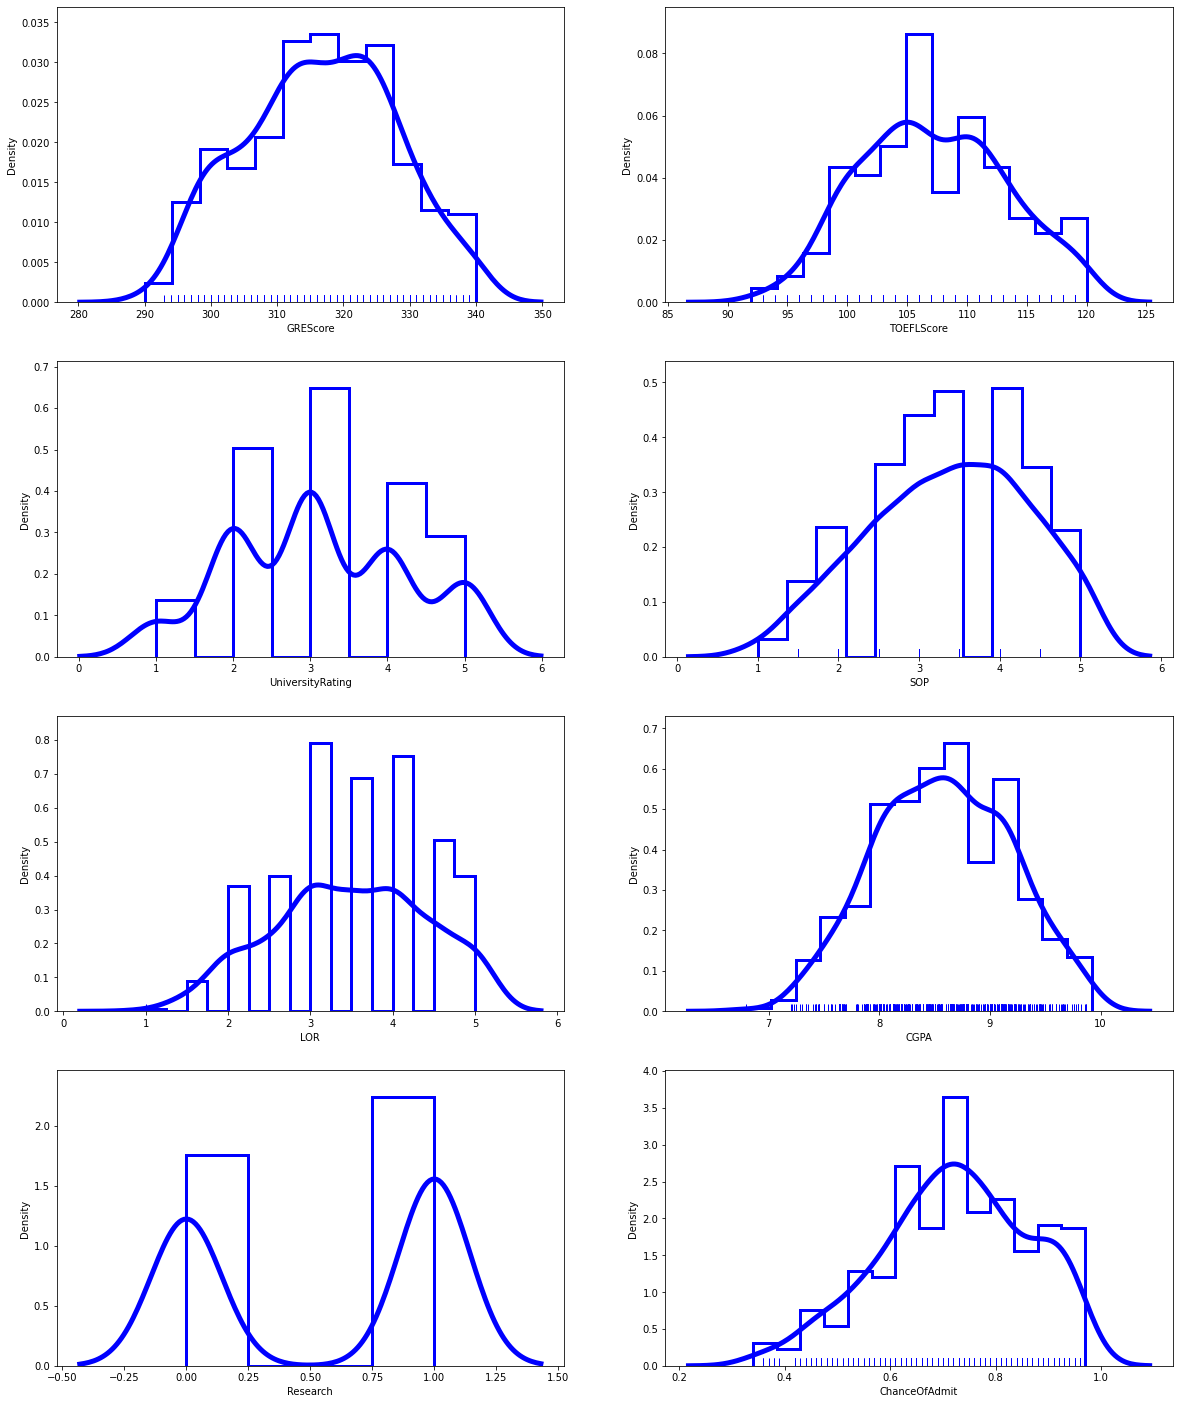

In [27]:
plt.figure(figsize=(20,25))
i = 0

for item in dp.columns:
    i += 1
    plt.subplot(4, 2, i)
    sns.distplot(dp[item], rug=True, rug_kws={"color": "b"},kde=True,
                 kde_kws={"color": "blue", "lw": 5, "label": "KDE"},
                 hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "blue"},label="{0}".format(item))
#     sns.distplot(admission_v1[item], kde=True,label="{0}".format(item))
plt.show()

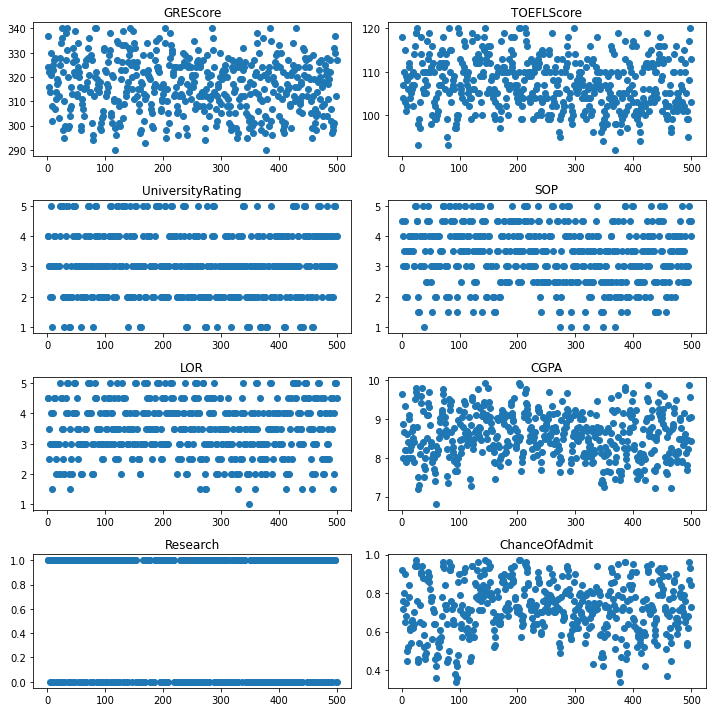

In [28]:
for i,col in enumerate(dp.columns):
    plt.subplot(4,2,i+1)
    plt.scatter(np.arange(1,501),dp[col].values.tolist())
    plt.title(col)
    fig, ax = plt.gcf(), plt.gca()
    fig.set_size_inches(10, 10)
    plt.tight_layout()
plt.show()

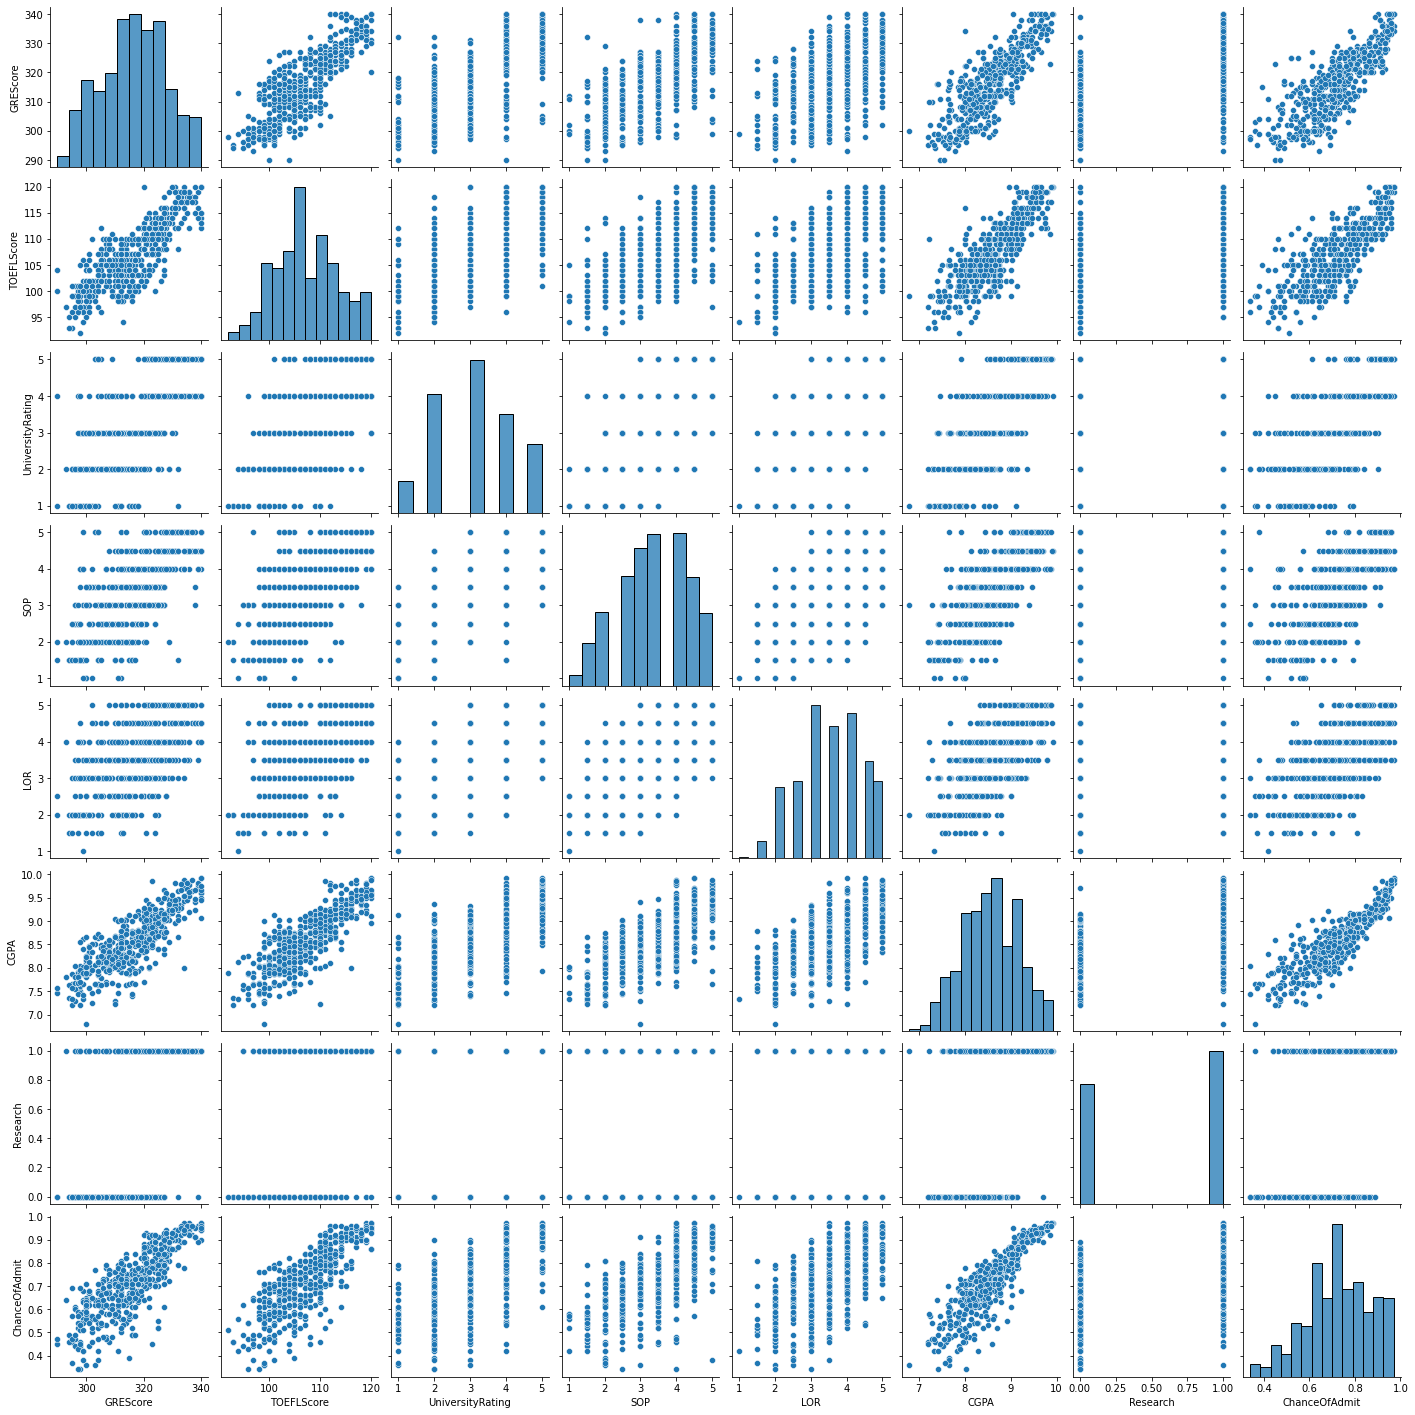

In [29]:
sns.pairplot(dp)
plt.show()

/home/first/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/first/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 36.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/first/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/first/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be

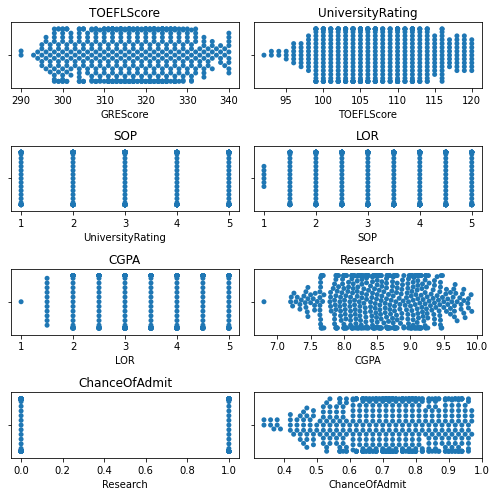

In [30]:
plt.figure(figsize=(7,7))
for i,col in enumerate(dp.columns):
    plt.title(col)
    plt.subplot(4,2,i+1)
    sns.swarmplot(dp[col])
    ax,fig=plt.gcf(),plt.gca()
    plt.tight_layout()
plt.show()

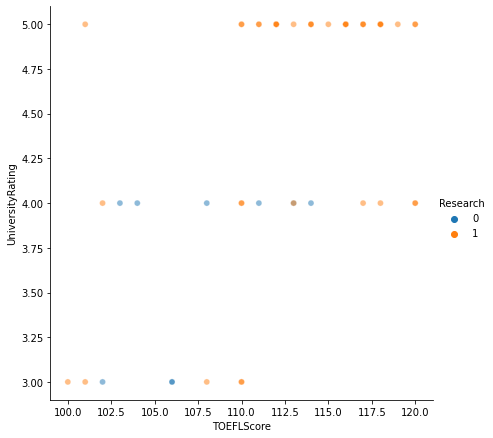

In [31]:
data_lor=dp[dp['LOR']>4.5]
sns.relplot(x="TOEFLScore", y="UniversityRating", hue="Research",
            sizes=(40, 400), alpha=.5,
            height=6, data=data_lor)

/home/first/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


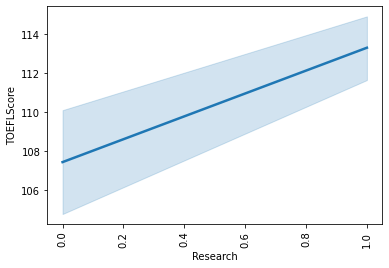

In [32]:
# Show each distribution with both violins and points
sns.lineplot(data_lor.Research,data_lor.TOEFLScore,linewidth=2.5)
plt.xticks(rotation=90)
plt.show()

/home/first/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


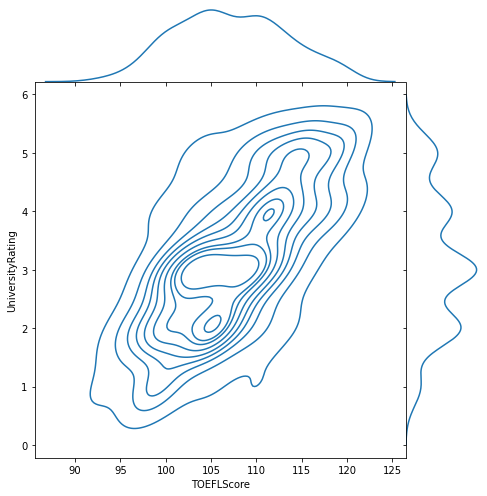

In [33]:
# Show the joint distribution using kernel density estimation
g = sns.jointplot(dp.TOEFLScore, dp.UniversityRating, kind="kde", height=7, space=0)
plt.show()

/home/first/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/first/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/first/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/first/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 23.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/first/.local/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning:

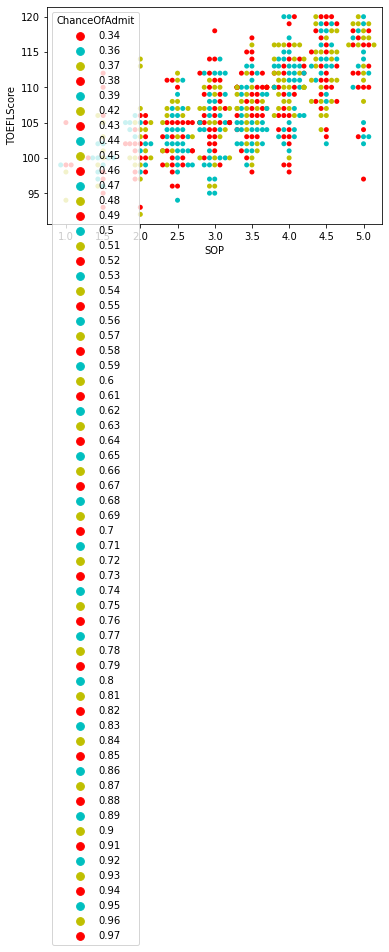

In [34]:
sns.swarmplot(y="TOEFLScore", x="SOP", hue="ChanceOfAdmit",
              palette=["r", "c", "y"], data=dp)
plt.show()

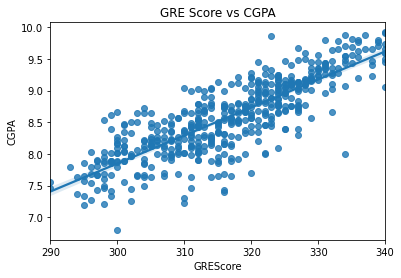

In [35]:
fig = sns.regplot(x="GREScore", y="CGPA", data=dp)
plt.title("GRE Score vs CGPA")
plt.show()

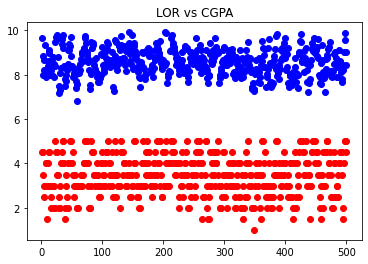

In [36]:
plt.scatter(x=np.arange(1,501),y=dp['CGPA'],color='b')
plt.scatter(x=np.arange(1,501),y=dp['LOR'],color='r')
plt.title("LOR vs CGPA")
plt.show()

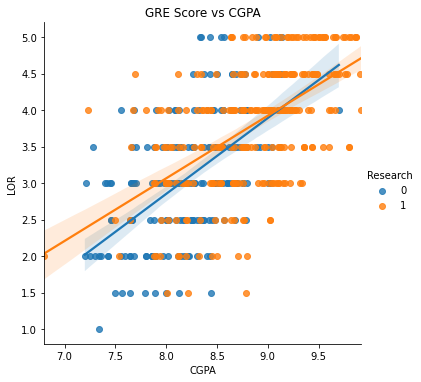

In [37]:
#Although there are exceptions, people with higher CGPA usually have higher GRE scores maybe because they are smart or hard working
fig = sns.lmplot(x="CGPA", y="LOR", data=dp, hue="Research")
plt.title("GRE Score vs CGPA")
plt.show()

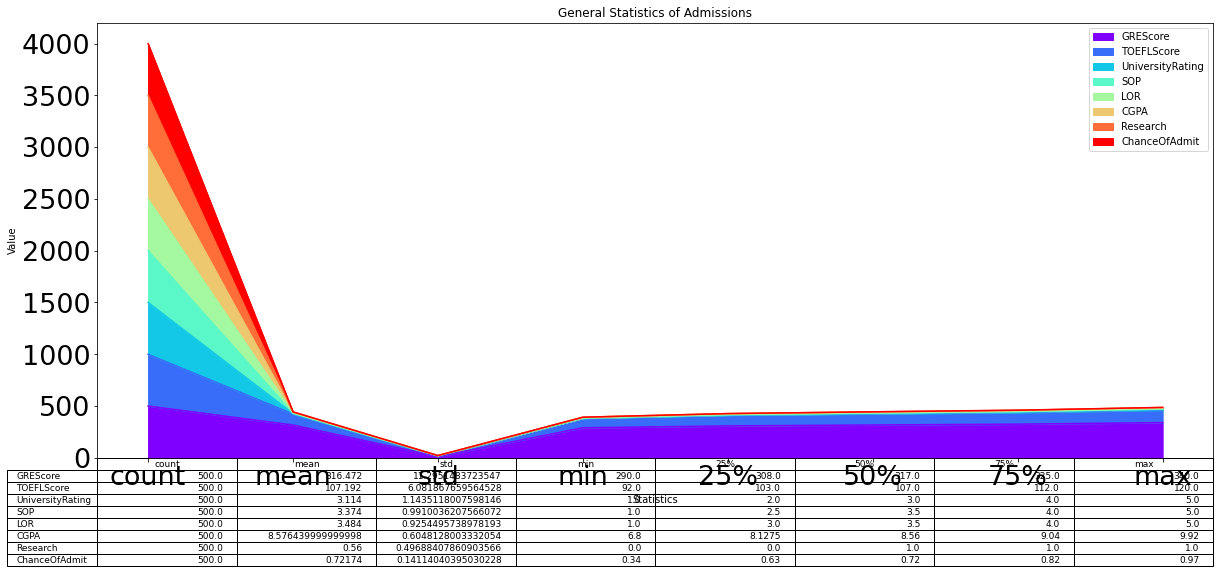

In [38]:
dp.describe().plot(kind = "area",fontsize=27, figsize = (20,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Admissions")
plt.show()

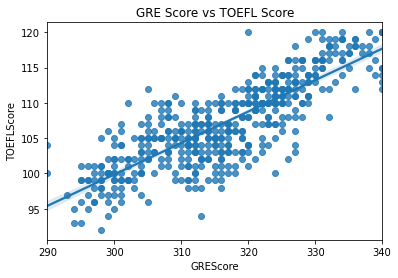

In [39]:
fig = sns.regplot(x=dp["GREScore"], y=dp["TOEFLScore"])
plt.title("GRE Score vs TOEFL Score")
plt.show()

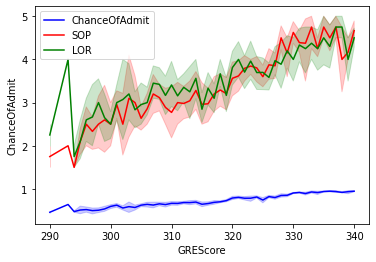

In [40]:
sns.lineplot(x="GREScore", y="ChanceOfAdmit",
             data=dp,color='b',label='ChanceOfAdmit')
sns.lineplot(x="GREScore", y="SOP",
             data=dp,color='r',label='SOP')
sns.lineplot(x="GREScore", y="LOR",
             data=dp,color='g',label='LOR')
plt.legend(loc=2)
plt.show()

/home/first/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


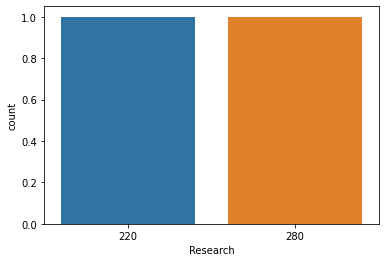

In [41]:
sns.countplot(dp.Research.value_counts())
plt.show()

As you can see above, we see that the value of the research property is not evenly distributed.
In addition, when we look at the correlation values, it is seen that the value of Research feature is not too significant.

In [42]:
dp[dp['ChanceOfAdmit']>0.85].groupby('Research')['UniversityRating'].median()

Research
0    4
1    5
Name: UniversityRating, dtype: int64

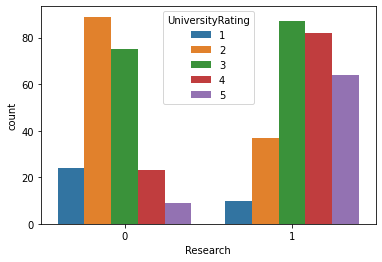

In [43]:
sns.countplot(x='Research', hue='UniversityRating', data=dp)
plt.show()

/home/first/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


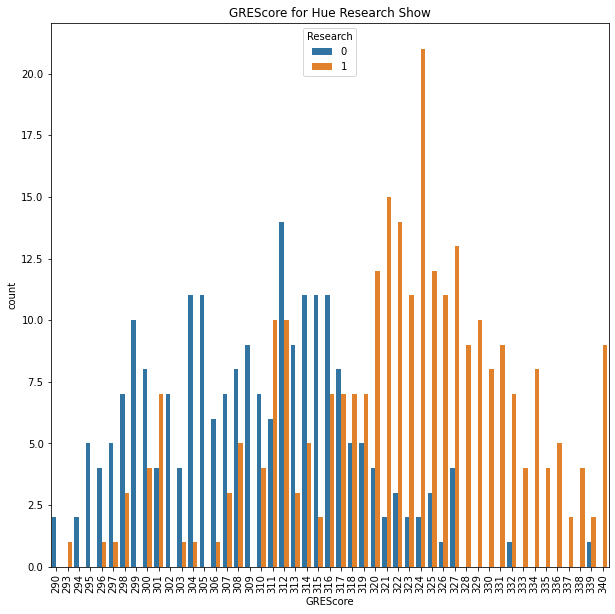

In [44]:
plt.figure(figsize=(10,10))
sns.countplot(dp.GREScore,hue=dp.Research)
plt.title('GREScore for Hue Research Show')
plt.xticks(rotation=90)
plt.show()

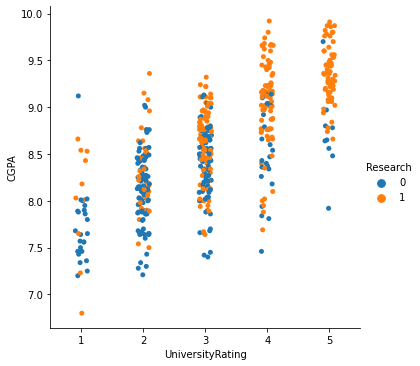

In [45]:
sns.catplot(y="CGPA", x="UniversityRating", hue="Research", data=dp)
plt.show()

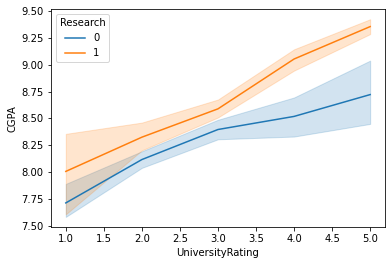

In [46]:
sns.lineplot(y="CGPA", x="UniversityRating",
             hue="Research",data=dp)
plt.show()

The above mentioned graphs are visualized on the university rates and the research process that appears in the graphs.

**GRE-SCORE ANALYSIS**

In [47]:
print("Max GREScore :",max(dp.GREScore))
print("Min GREScore :",min(dp.GREScore))
#We will now perform an analysis with GREScore. In this analysis, 
#we will give ourselves a certain range and we will proceed with these intervals.

Max GREScore : 340
Min GREScore : 290


In [48]:
maxvalues=dp[dp.GREScore>=320]
meanvalues=dp[(dp.GREScore>295)&(dp.GREScore<320)]
minvalues=dp[(dp.GREScore<=295)]

In [49]:
print(len(maxvalues))
print(len(meanvalues))
print(len(minvalues))

213
277
10


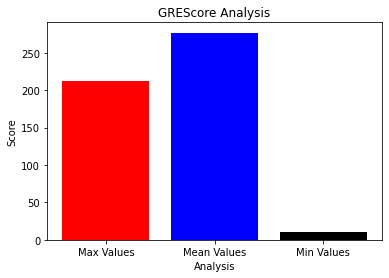

In [50]:
y=np.array([len(maxvalues),len(meanvalues),len(minvalues)])
x=['Max Values','Mean Values','Min Values']
colorlists=['red','blue','black']
plt.bar(x,y,color=colorlists)
plt.title('GREScore Analysis')
plt.xlabel('Analysis')
plt.ylabel('Score')
plt.show()

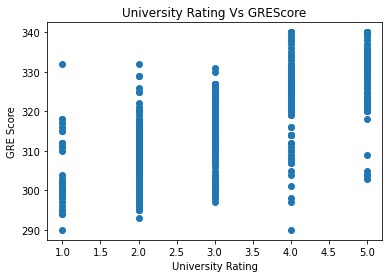

In [51]:
plt.scatter(x='UniversityRating',y='GREScore',data=dp)
plt.xlabel('University Rating')
plt.ylabel('GRE Score')
plt.title('University Rating Vs GREScore')
plt.show()

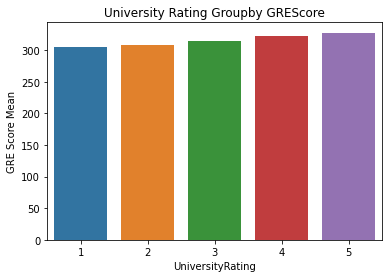

In [52]:
dp.groupby('UniversityRating')['GREScore'].mean()
sns.barplot(x=dp.groupby('UniversityRating')['GREScore'].mean().index,y=dp.groupby('UniversityRating')['GREScore'].mean().values)
plt.ylabel('GRE Score Mean')
plt.title('University Rating Groupby GREScore')
plt.show()

**TOFEL Score Analysis**

In [53]:
print("Min TOEFLScore :",min(dp.TOEFLScore))
print("Max TOEFLScore :",max(dp.TOEFLScore))

Min TOEFLScore : 92
Max TOEFLScore : 120


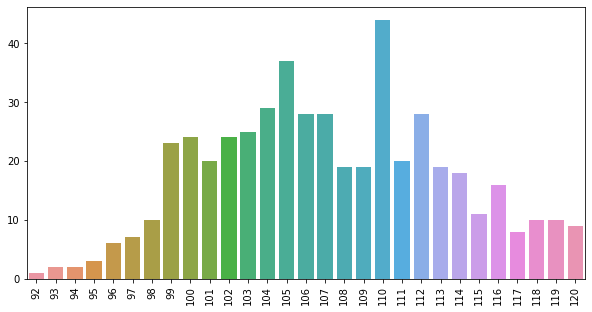

In [54]:
plt.figure(figsize=(10,5))
sns.barplot(x=dp.TOEFLScore.value_counts().index,y=dp.TOEFLScore.value_counts().values)
plt.xticks(rotation=90)
plt.show()

A visible rating is available for the TOEFL Score feature. The 110 Score value is the most received value. and 92 Score value is the lowest received value. Later on, we will continue our understandings.

**University Rating Analysis**

In [55]:
dp.UniversityRating.value_counts()

3    162
2    126
4    105
5     73
1     34
Name: UniversityRating, dtype: int64

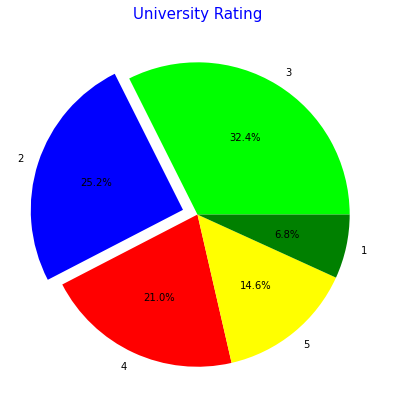

In [56]:
#The analysis of the university rating values was made. 
#A maximum of 3.0 is shown in the extracted results. All of these analysis results are given in pie.
colors = ['lime','blue','red','yellow','green']
explode = [0,0.1,0,0,0]
plt.figure(figsize=(7,7))
plt.pie(dp.UniversityRating.value_counts().values,explode=explode,labels=dp.UniversityRating.value_counts().index,colors=colors,autopct='%1.1f%%')
plt.title('University Rating',color='blue',fontsize=15)
plt.show()

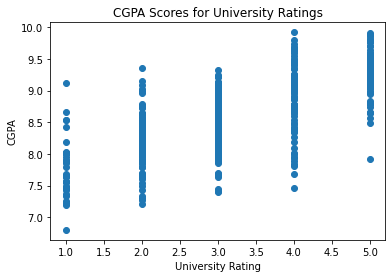

In [57]:
#Multiple analysis and representation in graphics
plt.scatter(dp.UniversityRating,dp.CGPA)
plt.title("CGPA Scores for University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

/home/first/.local/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


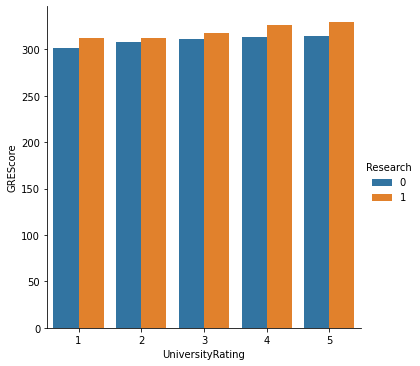

In [58]:
tt = dp.groupby(['UniversityRating','Research']).mean().reset_index()
sns.factorplot(x='UniversityRating', y='GREScore', hue='Research', data=tt, kind='bar')
plt.show()

In [59]:
dp.groupby('UniversityRating')[['SOP','LOR','CGPA']].mean()

,SOP,LOR,CGPA
UniversityRating,,,
1,1.941176,2.426471,7.798529
2,2.682540,2.956349,8.177778
3,3.308642,3.401235,8.500123
4,4.000000,3.947619,8.936667
5,4.479452,4.404110,9.278082


We used scatter function in this section. Because each student has a certain CGPA value. We tried this way to show them better. In addition, we can see that the people who are very hardworking are better than CGPA values.

**CGPA vs GRE Score Analysis**

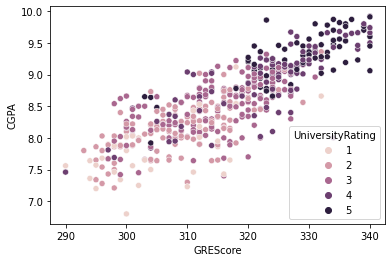

In [60]:
sns.scatterplot(y="CGPA", x="GREScore",
                hue="UniversityRating",
                data=dp)
plt.show()

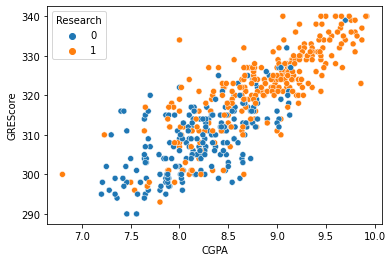

In [61]:
sns.scatterplot(x="CGPA", y="GREScore",
                hue="Research",
                data=dp)
plt.show()

/home/first/.local/lib/python3.8/site-packages/seaborn/categorical.py:441: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  artist_dict = ax.boxplot(box_data,
/home/first/.local/lib/python3.8/site-packages/seaborn/categorical.py:441: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  artist_dict = ax.boxplot(box_data,
/home/first/.local/lib/python3.8/site-packages/seaborn/categorical.py:441: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  artist_dict = ax.boxplot(box_data,
/home/first/.local/lib/python3.8/site-packages/seaborn/categorical.py:441: MatplotlibDeprecationWarning: S

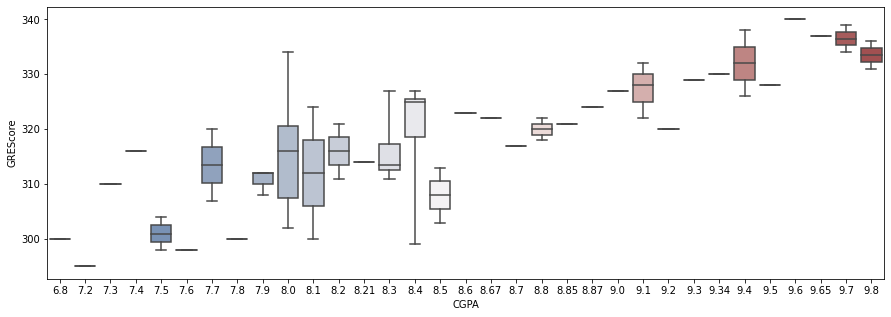

In [62]:
plt.figure(figsize=(15,5))
sns.boxplot(x="CGPA", y="GREScore", data=dp[:60],whis="range", palette="vlag")
plt.show()

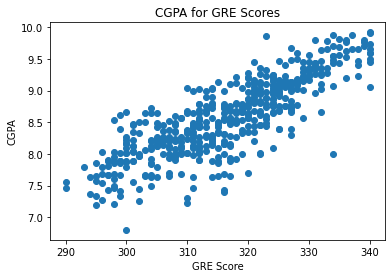

In [63]:
plt.scatter(dp.GREScore,dp.CGPA)
plt.title("CGPA for GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

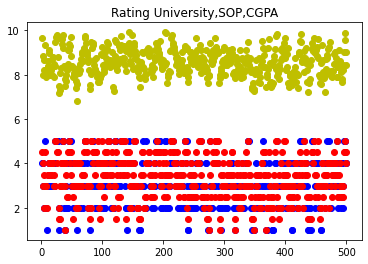

In [64]:
plt.scatter(x=np.arange(1,501),y=dp['UniversityRating'],color='b')
plt.scatter(x=np.arange(1,501),y=dp['SOP'],color='r')
plt.scatter(x=np.arange(1,501),y=dp['CGPA'],color='y')
plt.title('Rating University,SOP,CGPA')
plt.show()

In [65]:
print("Min CGPA Score :",min(dp.CGPA))
print("Max CGPA Score :",max(dp.CGPA))

Min CGPA Score : 6.8
Max CGPA Score : 9.92


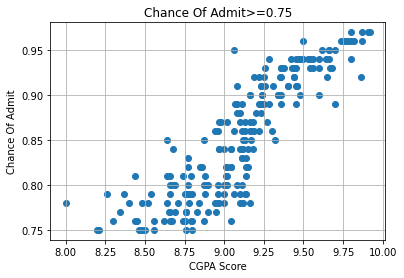

In [66]:
plt.scatter(x=dp[dp.ChanceOfAdmit >=0.75].CGPA,y=dp[dp.ChanceOfAdmit >=0.75].ChanceOfAdmit)
plt.xlabel("CGPA Score")
plt.ylabel("Chance Of Admit")
plt.title("Chance Of Admit>=0.75")
plt.grid(True)
plt.show()

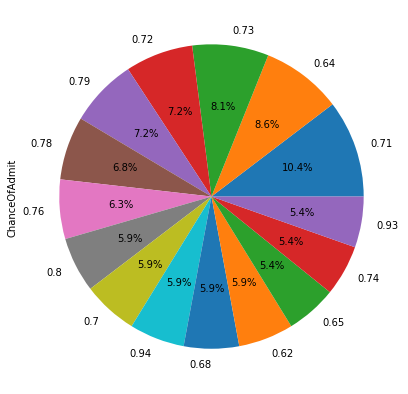

In [67]:
plt.figure(1, figsize=(7,7))
dp['ChanceOfAdmit'].value_counts().head(15).plot.pie(autopct="%1.1f%%")
plt.show()

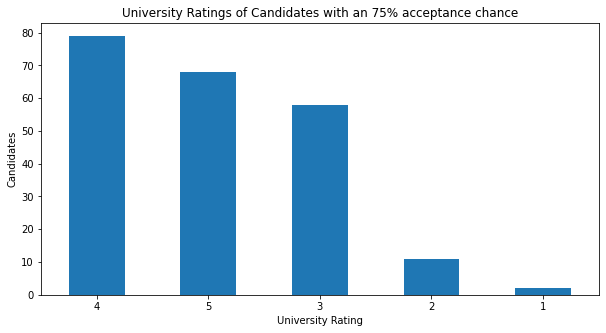

In [68]:
s = dp[dp["ChanceOfAdmit"] >= 0.75]["UniversityRating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
color_list=['red','blue','yellow','orange','black']
s.plot(kind='bar',figsize=(10, 5))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.xticks(rotation=360)
plt.show()

In [69]:
dp.head()
dp[(dp.TOEFLScore>100) & (dp['Research']==0)].head()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceOfAdmit
4,314,103,2,2.0,3.0,8.21,0,0.65
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45
15,314,105,3,3.5,2.5,8.30,0,0.54


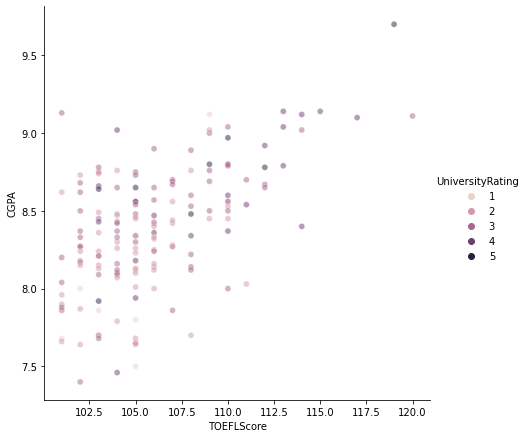

In [70]:
sns.relplot(x="TOEFLScore", y="CGPA", hue="UniversityRating",
            sizes=(40, 400), alpha=.5,
            height=6, data=dp[(dp.TOEFLScore>100) & (dp['Research']==0)])
plt.show()

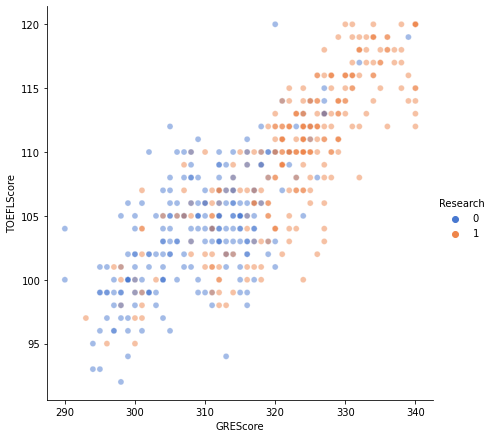

In [71]:
sns.relplot(x="GREScore", y="TOEFLScore", hue="Research",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=dp)
plt.show()

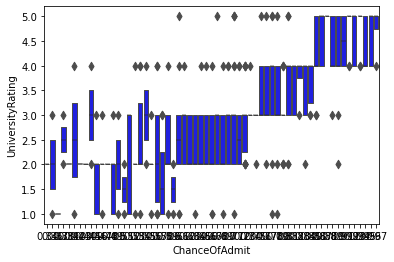

In [72]:
sns.boxenplot(x="ChanceOfAdmit", y="UniversityRating",
              color="b",scale="linear", data=dp)
plt.show()

In [73]:
index_ChaceOfAdmit=[]
for sop in dp.SOP.value_counts().index:
    index_ChaceOfAdmit.append(len(dp[(dp['SOP']==sop)&(dp['ChanceOfAdmit']>0.75)]))

Our data is a situation that summarizes the numerical relationships between each other. This corr () function reveals the correlation values between the data. As can be seen, the first five relationships are almost 1.0000 between each other. This is good for now. But if we do this for all features, this is not good.

In [74]:
dp.iloc[:,:-1].corr()

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
GREScore,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398
TOEFLScore,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012
UniversityRating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000


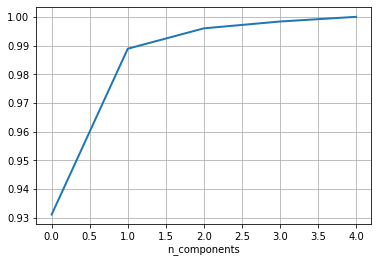

In [75]:
from sklearn.decomposition import PCA
pca=PCA()
pca.n_components=5
pca_data=pca.fit_transform(dp)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained=np.cumsum(percentage_var_explained)

plt.figure(1,figsize=(6,4))

plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.show()

In [76]:
dp['ChanceOfAdmit']=[1 if chance>=0.75  else 0 for chance in dp['ChanceOfAdmit']]

In [77]:
dp=dp.astype(float)

So, we need to analyze in-house for each feature value. In order for this analysis to be very robust, we need to index all values between values. There are many different methods for this. But we'il do it. Normalization or z-score. We're going to do a z-score here.

Some analysts perform the train_test_split process first.After ,we need to make scale values.This system that's true.

All correlation values between the data are listed in the previous sections. As a result of this listing, it is aimed to ensure that these properties are used in different places by performing different operations. Thus, the p-value process determines a hypothesis and a hypothesis thesis is presented between each characteristic according to this hypothesis. In this process, after determining the Class property as hypothesis, the relations between all the other properties are checked. This results in a different number for each property. What is important here is that these numbers are not close to 1.00. If the number is close to 1.00 this is very bad.




**MODEL, TRAINING and TESTING**

As a result of our initial evaluations, we have used a number of artificial learning algorithms. These are **logistic regression, support vector machine (SVM), k close neighborhood (kNN), GradientBoostingClassifier and RandomForestClassifier algorithms**. The first algorithm is **logistic regression** algorithm. To implement this algorithm model, we need to separate dependent and independent variables within our data sets. In addition, we created a combination of features between different features to make different experiments. While creating these parameters, the process of finding the best results was made by giving hyper parameter values.

First, we have 19 properties. By grouping these features we will see which one is the most successful.

In [78]:
dataX=dp.drop('ChanceOfAdmit',axis=1)
dataY=dp['ChanceOfAdmit']

In [79]:
X_train,X_test,y_train,y_test=train_test_split(dataX,dataY,test_size=0.2,random_state=42)

In [80]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (400, 7)
X_test (100, 7)
y_train (400,)
y_test (100,)


The difference in value between our data is too big. It increases both the volume and the results are very bad. To reduce this situation we need to use the StandardScaler function. A value of -1.1 will be obtained after using it.

In [81]:
'''sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
'''
X_train = (X_train - np.min(X_train))/(np.max(X_train)-np.min(X_train))
X_test = (X_test - np.min(X_test))/(np.max(X_test)-np.min(X_test))

In [82]:
def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def plot_feature_importances(gbm):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), gbm.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [83]:
combine_features_list=[
    ('GREScore','TOEFLScore','UniversityRating'),
    ('SOP','LOR','CGPA','Research'),
    ('GREScore','SOP','TOEFLScore','CGPA'),
    ('UniversityRating','Research')
]

**Logistic Regression**

First we need parameters to use our data more effectively. Hyperthermatic technique was used for this condition. This technique is used to express different features in the process.

Logistic Regression (aka logit, MaxEnt) classifier. In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross- entropy loss if the ‘multi_class’ option is set to ‘multinomial’. (Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’ and ‘newton-cg’ solvers.) This class implements regularized logistic regression using the ‘liblinear’ library, ‘newton-cg’, ‘sag’ and ‘lbfgs’ solvers. It can handle both dense and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit floats for optimal performance; any other input format will be converted (and copied). The ‘newton-cg’, ‘sag’, and ‘lbfgs’ solvers support only L2 regularization with primal formulation. The ‘liblinear’ solver supports both L1 and L2 regularization, with a dual formulation only for the L2 penalty.

In [103]:
solver= {'liblinear'}
parameters=[
{
    'penalty':['l1','l2'],
    'C':[0.1,0.4,0.5],
    'random_state':[0]
    },
]

for features in combine_features_list:
    print(features)
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
    
    gslog=GridSearchCV(LogisticRegression(solver='liblinear'),parameters,scoring='accuracy')
    gslog.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gslog.best_params_)
    print()
    predictions=[
    (gslog.predict(X_train_set),y_train,'Train'),
    (gslog.predict(X_test_set),y_test,'Test1'),
    ]
    
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1],pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)

    print("*"*50)    
    basari=cross_val_score(estimator=LogisticRegression(),X=X_train,y=y_train,cv=12)
    print(basari.mean())
    print(basari.std())
    print("*"*50) 


('GREScore', 'TOEFLScore', 'UniversityRating')
**************************************************
Best parameters set:
{'C': 0.4, 'penalty': 'l1', 'random_state': 0}

Train Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.89       218
         1.0       0.88      0.84      0.86       182

    accuracy                           0.88       400
   macro avg       0.88      0.87      0.87       400
weighted avg       0.88      0.88      0.87       400

**************************************************
Train Confusion Matrix:
[[197  21]
 [ 29 153]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89        64
         1.0       0.78      0.86      0.82        36

    accuracy                     

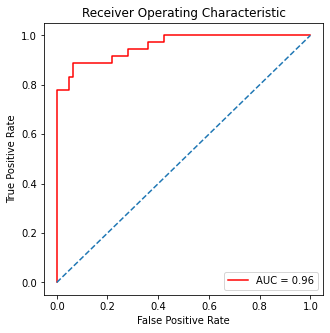

Accurancy Oranı : 0.85
Logistic TRAIN score with  0.8825
Logistic TEST score with  0.85

[[53 11]
 [ 4 32]]


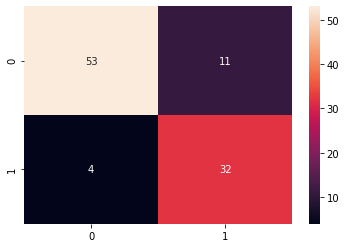

In [104]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=0.1,penalty='l2',random_state=0)
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)


y_proba=lr.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)


from sklearn.metrics import r2_score,accuracy_score

#print('Hata Oranı :',r2_score(y_test,y_pred))
print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("Logistic TRAIN score with ",format(lr.score(X_train, y_train)))
print("Logistic TEST score with ",format(lr.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()


**K-Nearest Neighbors**

In [105]:


parameters=[
{
    'n_neighbors':np.arange(2,33),
    'n_jobs':[2,6]
    },
]
print("*"*50)
for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
   
    gsknn=GridSearchCV(KNeighborsClassifier(),parameters,scoring='accuracy')
    gsknn.fit(X_train_set,y_train)
    print('Best parameters set:')
    print(gsknn.best_params_)
    print("*"*50)
    predictions = [
    (gsknn.predict(X_train_set), y_train, 'Train'),
    (gsknn.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=KNeighborsClassifier(),X=X_train,y=y_train,cv=12)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
**************************************************
Best parameters set:
{'n_jobs': 2, 'n_neighbors': 27}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       218
         1.0       0.87      0.82      0.85       182

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400

**************************************************
Train Confusion Matrix:
[[195  23]
 [ 32 150]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.93      0.84      0.89        64
         1.0       0.76      0.89      0.82     

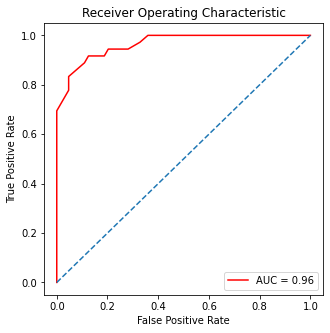

Accurancy Oranı : 0.89
KNN TRAIN score with  0.88
KNN TEST score with  0.89

[[56  8]
 [ 3 33]]


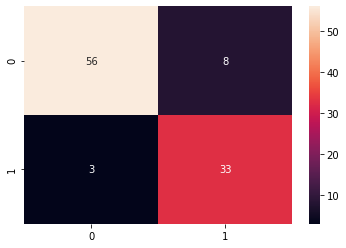

In [106]:
knn=KNeighborsClassifier(n_jobs=2, n_neighbors=22)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

y_proba=knn.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("KNN TRAIN score with ",format(knn.score(X_train, y_train)))
print("KNN TEST score with ",format(knn.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()


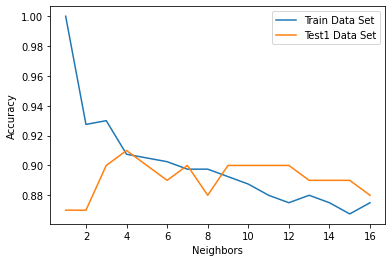

In [107]:
n_neighbors = range(1, 17)
train_data_accuracy = []
test1_data_accuracy = []
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    knn.fit(X_train, y_train)
    train_data_accuracy.append(knn.score(X_train, y_train))
    test1_data_accuracy.append(knn.score(X_test, y_test))
plt.plot(n_neighbors, train_data_accuracy, label="Train Data Set")
plt.plot(n_neighbors, test1_data_accuracy, label="Test1 Data Set")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

In [108]:
n_neighbors = range(1, 17)
k_scores=[]
for n_neigh in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neigh,n_jobs=5)
    scores=cross_val_score(estimator=knn,X=X_train,y=y_train,cv=12)
    k_scores.append(scores.mean())
print(k_scores)

[0.8472964943553177, 0.8427658942364823, 0.8801247771836006, 0.8825757575757577, 0.8700980392156862, 0.8775252525252525, 0.8800505050505051, 0.8674985145573381, 0.8650475341651812, 0.8700237670825904, 0.8625965537730242, 0.872549019607843, 0.8700980392156862, 0.8676470588235293, 0.8726232917409388, 0.872549019607843]


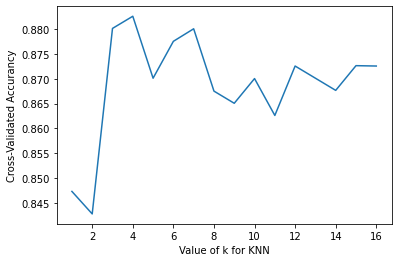

In [109]:
plt.plot(n_neighbors,k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel("Cross-Validated Accurancy")
plt.show()

**Naive Bayes**

In [110]:
parameters = [
    {
        'kernel': ['linear'],
        'random_state': [2]
    },
    {
        'kernel': ['rbf'],
        'gamma':[0.9,0.06,0.3],
        'random_state': [0],
        'C':[1,2,3,4,5,6],
        'degree':[2],
        'probability':[True]
    },
]

for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test_set=X_test.loc[:,features]
  
    svc = GridSearchCV(SVC(), parameters,
    scoring='accuracy')
    svc.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(svc.best_params_)
    print("*"*50)
    predictions = [
    (svc.predict(X_train_set), y_train, 'Train'),
    (svc.predict(X_test_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=SVC(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
Best parameters set:
{'kernel': 'linear', 'random_state': 2}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88       218
         1.0       0.88      0.82      0.85       182

    accuracy                           0.87       400
   macro avg       0.87      0.86      0.87       400
weighted avg       0.87      0.87      0.87       400

**************************************************
Train Confusion Matrix:
[[198  20]
 [ 33 149]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89        64
         1.0       0.78      0.86      0.82        36

    accuracy                         

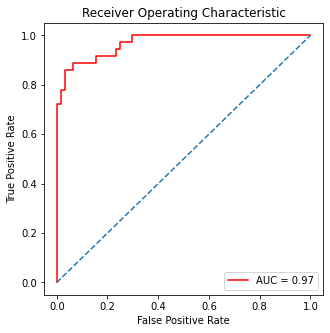

Accurancy Oranı : 0.87
SVC TRAIN score with  0.8875
SVC TEST score with  0.87

[[55  9]
 [ 4 32]]


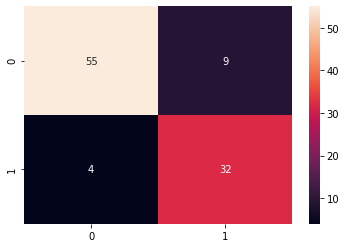

In [111]:
svc=SVC(C=5,degree=2,gamma=0.06,kernel='rbf',probability=True,random_state=0)
svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

y_proba=svc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score

print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("SVC TRAIN score with ",format(svc.score(X_train, y_train)))
print("SVC TEST score with ",format(svc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

**Random Forest**

In [112]:
parameters = [
    {
        'max_depth': np.arange(1, 10),
        'min_samples_split': np.arange(2, 5),
        'random_state': [3],
        'n_estimators': np.arange(10, 20)
    },
]

for features in combine_features_list:
    print("*"*50)
    
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    tree=GridSearchCV(RandomForestClassifier(),parameters,scoring='accuracy')
    tree.fit(X_train_set, y_train)
    
    print('Best parameters set:')
    print(tree.best_params_)
    print("*"*50)
    predictions = [
        (tree.predict(X_train_set), y_train, 'Train'),
        (tree.predict(X_test1_set), y_test, 'Test1')
    ]
    
    for pred in predictions:
        
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
    
    print("*"*50)    
    basari=cross_val_score(estimator=RandomForestClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)

**************************************************
Best parameters set:
{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 11, 'random_state': 3}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       218
         1.0       0.88      0.84      0.86       182

    accuracy                           0.88       400
   macro avg       0.88      0.87      0.87       400
weighted avg       0.88      0.88      0.87       400

**************************************************
Train Confusion Matrix:
[[198  20]
 [ 30 152]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.92      0.88      0.90        64
         1.0       0.79      0.86      0.83        3

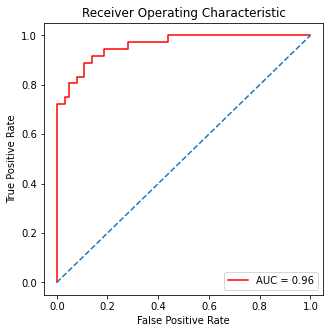

Accurancy Oranı : 0.87
RandomForestClassifier TRAIN score with  0.97
RandomForestClassifier TEST score with  0.87

[[57  7]
 [ 6 30]]


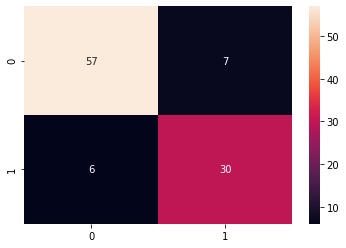

In [114]:
rfc=RandomForestClassifier(max_depth=7,min_samples_split=4,n_estimators=19,random_state=3)
rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

y_proba=rfc.predict_proba(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)

from sklearn.metrics import r2_score,accuracy_score
print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("RandomForestClassifier TRAIN score with ",format(rfc.score(X_train, y_train)))
print("RandomForestClassifier TEST score with ",format(rfc.score(X_test, y_test)))
print()

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()

In [116]:


for i in range(1,11):
    rf = RandomForestClassifier(n_estimators=i, random_state = 3, max_depth=7)
    rf.fit(X_train, y_train)
    print("TEST set score w/ " +str(i)+" estimators: {:.5}".format(rf.score(X_test, y_test)))



TEST set score w/ 1 estimators: 0.89
TEST set score w/ 2 estimators: 0.91
TEST set score w/ 3 estimators: 0.93
TEST set score w/ 4 estimators: 0.89
TEST set score w/ 5 estimators: 0.9
TEST set score w/ 6 estimators: 0.89
TEST set score w/ 7 estimators: 0.9
TEST set score w/ 8 estimators: 0.91
TEST set score w/ 9 estimators: 0.9
TEST set score w/ 10 estimators: 0.89


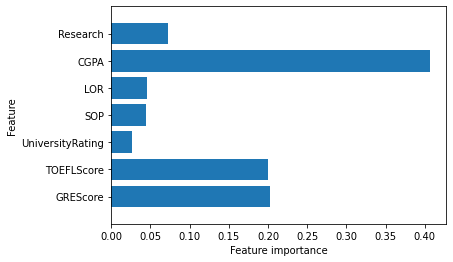

In [117]:
plot_feature_importances(rf)
plt.show()

**Decision Tree**

In [118]:
parameters = [
{
    'random_state': [42],
    },
]
for features in combine_features_list:
    print("*"*50)
    X_train_set=X_train.loc[:,features]
    X_test1_set=X_test.loc[:,features]
    
    dtr = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='accuracy')
    dtr.fit(X_train_set, y_train)
    print('Best parameters set:')
    print(dtr.best_params_)
    print("*"*50)
    predictions = [
    (dtr.predict(X_train_set), y_train, 'Train'),
    (dtr.predict(X_test1_set), y_test, 'Test1')
    ]
    for pred in predictions:
        print(pred[2] + ' Classification Report:')
        print("*"*50)
        print(classification_report(pred[1], pred[0]))
        print("*"*50)
        print(pred[2] + ' Confusion Matrix:')
        print(confusion_matrix(pred[1], pred[0]))
        print("*"*50)
        
    print("*"*50)    
    basari=cross_val_score(estimator=DecisionTreeClassifier(),X=X_train,y=y_train,cv=4)
    print(basari.mean())
    print(basari.std())
    print("*"*50)  

**************************************************
Best parameters set:
{'random_state': 42}
**************************************************
Train Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       218
         1.0       0.98      0.92      0.95       182

    accuracy                           0.95       400
   macro avg       0.96      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400

**************************************************
Train Confusion Matrix:
[[214   4]
 [ 15 167]]
**************************************************
Test1 Classification Report:
**************************************************
              precision    recall  f1-score   support

         0.0       0.93      0.81      0.87        64
         1.0       0.73      0.89      0.80        36

    accuracy                           0.84       100
  